In [1]:
# Load the autoreload extension
%load_ext autoreload

# Set autoreload mode
%autoreload 2
from PyEyeSim import EyeData,extract_heatmap_arrays, extract_angle_arrays, RSA_from_angles, RSA_from_heatmaps, RSA_from_mem
import glob
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist
import seaborn as sns
from icecream import ic
import math
import numpy as np
import pickle

In [2]:
NUMBER_OF_SUBJECTS = 50
# subjects with different FOV
subjects_1920 = [1, 2, 3, 14, 15, 17, 18, 19, 20, 21, 22, 36, 37]
# FOV shift common
coordinate_shift_1280 = [262, 390]
# FOV shift rare
coordinate_shift_1920 = [290, 710]
# image pixels (quadratic)
IMAGE_DIMS = 500

fixation_file_pattern ='*_FIX_R*'

filename_prototype = "/Users/juliusduin/Desktop/Master-Psychologie/MA/data/prep_fixs/"

fixation_files = glob.glob(filename_prototype+fixation_file_pattern)

all_subjects_df = pd.concat((pd.read_csv(file) for file in fixation_files))
all_subjects_df['subID_num'] = all_subjects_df['subID'].str.extract('(\d+)').astype(int)
all_subjects_df['viewing_position'] = all_subjects_df['subID_num'].apply(lambda x: 1 if x in subjects_1920 else 0)
all_subjects_df['x'] = all_subjects_df.apply(
    lambda row: row['mean_x'] - coordinate_shift_1920[1] if row['viewing_position'] == 1 else row['mean_x'] -
                                                                                              coordinate_shift_1280[1],
    axis=1)
all_subjects_df['y'] = all_subjects_df.apply(
    lambda row: row['mean_y'] - coordinate_shift_1920[0] if row['viewing_position'] == 1 else row['mean_y'] -
                                                                                              coordinate_shift_1280[0],
    axis=1)
all_subjects_df = all_subjects_df.drop(columns=['mean_x', 'mean_y'])
all_subjects_df['memory_bin'] = all_subjects_df['memory'].map({1: 1, 2: 1, 3: 2, 4: 2})

# extract scenes only
all_subjects_df = all_subjects_df[all_subjects_df.cat == 2]

In [3]:
MemData = EyeData('MemData', 'between', all_subjects_df, x_size=500,y_size=500)
MemData.DataInfo(FixDuration='duration',Stimulus='pic',subjectID='subID', mean_x='x', mean_y='y')
MemData.RunDescriptiveFix(Visual=0)

dataset size:  (37264, 13)
study design:  between
presentation size:  x= 500 pixels y= 500  pixels
presentation size:  x= 500 pixels y= 500  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 46 subjects, and 192 stimuli
run descriptive analysis
Data for  46 observers and  192  stimuli.


/Users/juliusduin/Desktop/uni_work/PyEyeSim/PyEyeSim/__init__.py:94: UserWarning: Stim path not provided
  warnings.warn('Stim path not provided')
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean fixation number:  8.48  +/-  1.28
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  4392
Mean X location:  239.8  +/-  27.6  pixels
Mean Y location:  249.0  +/-  41.1  pixels
Mean saccade  amplitude:  127.6  +/-  18.6  pixels
Mean scanpath  length:  943.2  +/-  180.9  pixels
Data for  46 observers and  192  stimuli.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean fixation number:  8.48  +/-  1.28
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  4392
Mean X location:  239.8  +/-  27.6  pixels
Mean Y location:  249.0  +/-  41.1  pixels
Mean saccade  amplitude:  127.6  +/-  18.6  pixels
Mean scanpath  length:  943.2  +/-  180.9  pixels


(array(['set1_s_1.png', 'set1_s_10.png', 'set1_s_11.png', 'set1_s_12.png',
        'set1_s_13.png', 'set1_s_14.png', 'set1_s_15.png', 'set1_s_16.png',
        'set1_s_17.png', 'set1_s_18.png', 'set1_s_19.png', 'set1_s_2.png',
        'set1_s_20.png', 'set1_s_21.png', 'set1_s_22.png', 'set1_s_23.png',
        'set1_s_24.png', 'set1_s_25.png', 'set1_s_26.png', 'set1_s_27.png',
        'set1_s_28.png', 'set1_s_29.png', 'set1_s_3.png', 'set1_s_30.png',
        'set1_s_31.png', 'set1_s_32.png', 'set1_s_33.png', 'set1_s_34.png',
        'set1_s_35.png', 'set1_s_36.png', 'set1_s_37.png', 'set1_s_38.png',
        'set1_s_39.png', 'set1_s_4.png', 'set1_s_40.png', 'set1_s_41.png',
        'set1_s_42.png', 'set1_s_43.png', 'set1_s_44.png', 'set1_s_45.png',
        'set1_s_46.png', 'set1_s_47.png', 'set1_s_48.png', 'set1_s_49.png',
        'set1_s_5.png', 'set1_s_50.png', 'set1_s_51.png', 'set1_s_52.png',
        'set1_s_53.png', 'set1_s_54.png', 'set1_s_55.png', 'set1_s_56.png',
        'set1_s_5

In [4]:
try:
    with open('example_pkl/angles_ex.pkl', 'rb') as f:
        anglesFromMemData = pickle.load(f)
    with open('example_pkl/heatmaps_ex.pkl', 'rb') as f:
        heatmapsFromMemData = pickle.load(f)
    with open('example_pkl/mem_ex.pkl', 'rb') as f:
        memRDMs = pickle.load(f)    
    with open('example_pkl/heatmaps20_ex.pkl', 'rb') as f:
        heatmapsFromMemData20 = pickle.load(f)
    with open('example_pkl/heatmaps50_ex.pkl', 'rb') as f:
        heatmapsFromMemData50 = pickle.load(f)
except:
    print('no data found, compute now')
    anglesFromMemData = extract_angle_arrays(MemData, MemData.stimuli)
    heatmapsFromMemData, heatmapPenalty = extract_heatmap_arrays(MemData, MemData.stimuli, [500, 500])
    memRDMs = RSA_from_mem(MemData, MemData.stimuli)
    heatmapsFromMemData20, heatmapPenalty20 = extract_heatmap_arrays(MemData, MemData.stimuli, [500, 500], resize_to=(20,20))
    heatmapsFromMemData50, heatmapPenalty50 = extract_heatmap_arrays(MemData, MemData.stimuli, [500, 500], resize_to=(50,50))

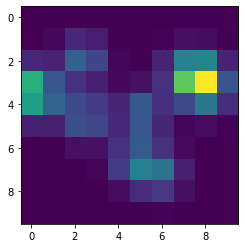

In [5]:
plt.imshow(heatmapsFromMemData[MemData.stimuli[0]]['S02'])

In [6]:
anglesRDMs = RSA_from_angles(anglesFromMemData, kind='simple')
heatmapsRDMs = RSA_from_heatmaps(heatmapsFromMemData)
heatmaps20RDMs = RSA_from_heatmaps(heatmapsFromMemData20)
heatmaps50RDMs = RSA_from_heatmaps(heatmapsFromMemData50)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [7]:
anglesRDMseuc = RSA_from_angles(anglesFromMemData, kind='euclidean')

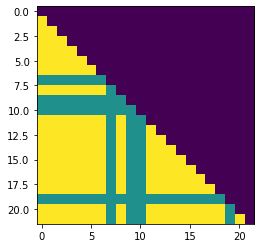

In [8]:
plt.imshow(memRDMs[MemData.stimuli[1]]);

In [9]:
def plotRDMdifferences(rdms, memrdms, vis=False):
    mem1a = []
    mem2b = []
    for img in rdms:
        mem1h = rdms[img][memrdms[img] == 2]
        mem2h = rdms[img][memrdms[img] == 1]
        mem1a.append(np.mean(mem1h))
        mem2b.append(np.mean(mem2h))
    if vis:
        plt.figure(figsize=(10, 10))
        plt.plot(mem1a)
        plt.plot(mem2b)
    return mem1a, mem2b

In [10]:
hmmem20_1, hmmem20_2 = plotRDMdifferences(heatmaps20RDMs, memRDMs)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
hmmem50_1, hmmem50_2 = plotRDMdifferences(heatmaps50RDMs, memRDMs)

In [12]:
hmmem_1, hmmem_2 = plotRDMdifferences(heatmapsRDMs, memRDMs)

In [13]:
angle_mem1 , angle_mem2 = plotRDMdifferences(anglesRDMs, memRDMs)

In [14]:
angleeuc_mem1 , angleuc_mem2 = plotRDMdifferences(anglesRDMseuc, memRDMs)

In [15]:
df_hm = pd.DataFrame({'hm' :['hm1', 'hm1', 'hm2', 'hm2', 'hm5', 'hm5', 'angle_avg_dist', 'angle_avg_dist', 'angle_single_dist', 'angle_single_dist'],
                      'memory': ['mem1', 'mem2', 'mem1', 'mem2', 'mem1', 'mem2', 'mem1', 'mem2', 'mem1','mem2'],
                      'values':[ np.nanmean(hmmem_1),np.nanmean(hmmem_2), np.nanmean(hmmem20_1), np.nanmean(hmmem20_2), np.nanmean(hmmem50_1), np.nanmean(hmmem50_2), np.nanmean(angle_mem1), np.nanmean(angle_mem2), np.nanmean(angleeuc_mem1), np.nanmean(angleuc_mem2)]})

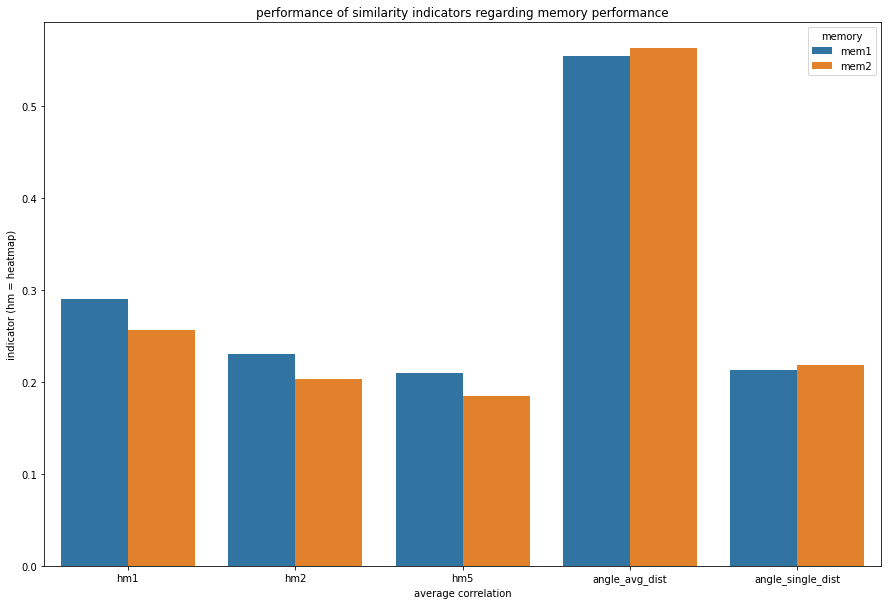

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x='hm', y='values', hue='memory', data=df_hm)
plt.title('performance of similarity indicators regarding memory performance')
plt.xlabel('average correlation')
plt.ylabel('indicator (hm = heatmap)');

In [17]:
def prune_sort_corr_angles(arr_1, arr_2, kind='euclidean'):


    # Find distances between each element in arr2 and arr1
    dists = np.abs(arr_2[:, np.newaxis] - arr_1)
    return dists


In [18]:
arr1 = np.array([1, 5, 9, 11])
arr2 = np.array([2, 3, 5, 6, 15])
np.mean(prune_sort_corr_angles(arr1, arr2, kind='euclidean'))

5.0